In [1]:
import numpy as ns
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm
import datetime as dt

C:\Users\Divyanshu\AppData\Local\Temp\ipykernel_5580\3111303863.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
years=15
endtime=dt.datetime.now()
starttime=endtime-dt.timedelta(years*365)

In [3]:
tickers=['SPY','BND','GLD','QQQ','VTI']

In [4]:
adj_close_price=pd.DataFrame()
for ticker in tickers:
    data=yf.download(ticker,start=starttime,end=endtime)
    adj_close_price[ticker]=data['Adj Close']
adj_close_price

C:\Users\Divyanshu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\Divyanshu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\Divyanshu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Pyt

,SPY,BND,GLD,QQQ,VTI
Date,,,,,
2009-06-09,71.401642,49.633877,93.830002,32.298374,36.107815
2009-06-10,71.220551,49.510235,93.860001,32.184753,36.016777
2009-06-11,71.537437,49.750996,93.699997,32.184753,36.229214
2009-06-12,71.733597,49.881065,92.169998,32.036163,36.259571
2009-06-15,70.088905,49.978725,91.099998,31.380564,35.417370
...,...,...,...,...,...
2024-05-29,526.099976,70.852745,216.160004,456.440002,259.720001
2024-05-30,522.609985,71.161789,216.570007,451.549988,258.450012
2024-05-31,527.369995,71.420998,215.300003,450.709991,260.440002


In [5]:
log_returns = ns.log(adj_close_price/adj_close_price.shift(1))
log_returns = log_returns.dropna()
log_returns

,SPY,BND,GLD,QQQ,VTI
Date,,,,,
2009-06-10,-0.002539,-0.002494,0.000320,-0.003524,-0.002524
2009-06-11,0.004440,0.004851,-0.001706,0.000000,0.005881
2009-06-12,0.002738,0.002611,-0.016463,-0.004627,0.000838
2009-06-15,-0.023195,0.001956,-0.011677,-0.020677,-0.023501
2009-06-16,-0.013656,0.004675,0.009070,-0.009797,-0.014022
...,...,...,...,...,...
2024-05-29,-0.007027,-0.003652,-0.009347,-0.007073,-0.008244
2024-05-30,-0.006656,0.004352,0.001895,-0.010771,-0.004902
2024-05-31,0.009067,0.003636,-0.005881,-0.001862,0.007670


In [6]:
portfolio_value = 1000000
weights = ns.array([1/len(tickers)]*len(tickers))
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [7]:
historical_returns = (log_returns*weights).sum(axis=1)
historical_returns

Date
2009-06-10   -0.002152
2009-06-11    0.002693
2009-06-12   -0.002981
2009-06-15   -0.015419
2009-06-16   -0.004746
                ...   
2024-05-29   -0.007069
2024-05-30   -0.003216
2024-05-31    0.002526
2024-06-03    0.004185
2024-06-04   -0.000306
Length: 3772, dtype: float64

In [8]:
days=5
range_returns = historical_returns.rolling(window=days).sum()
range_returns=range_returns.dropna()
range_returns


Date
2009-06-16   -0.022605
2009-06-17   -0.018198
2009-06-18   -0.021831
2009-06-19   -0.014143
2009-06-22   -0.019254
                ...   
2024-05-29   -0.013928
2024-05-30   -0.011891
2024-05-31   -0.000674
2024-06-03   -0.001539
2024-06-04   -0.003880
Length: 3768, dtype: float64

In [10]:
confidence_interval = 0.99

VaR = -ns.percentile(range_returns, 100 - (confidence_interval * 100))*portfolio_value
print(VaR)

43538.65450561855


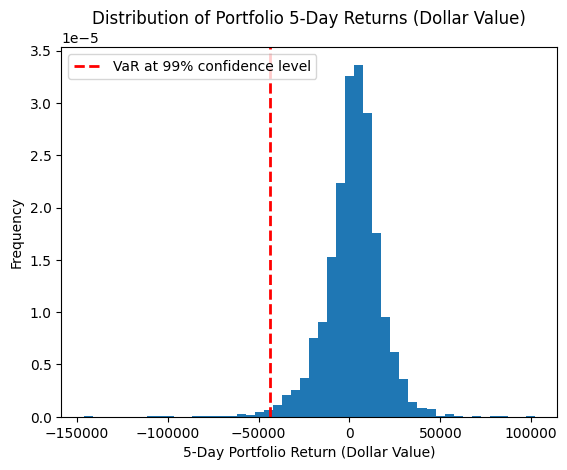

In [11]:
return_window = days
range_returns = historical_returns.rolling(window=return_window).sum()
range_returns = range_returns.dropna()

range_returns_dollar = range_returns * portfolio_value

plt.hist(range_returns_dollar.dropna(), bins=50, density=True)
plt.xlabel(f'{return_window}-Day Portfolio Return (Dollar Value)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {return_window}-Day Returns (Dollar Value)')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()